<a href="https://colab.research.google.com/github/cairoegito/Cluster-de-clientes/blob/main/Cluster_de_clientes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **1- OBJETIVO DE NEGÓCIO**

Agrupar os clientes com  certas semelhanças em seus comportamentos para que a empresa possa de maneira maus concreta e pontual entender o mecanismo de vendas e como aumentar os lucros 

**LEGENDAS DO NOSSO DATASET**

ID
numerical
unique identifier of each customer

Sex
categrical
0: male, 1: female

Marital status
categorical
0: single, 1: non-single (divorced, separated, married, widowed)
Age

numerical
age in years 

Education
categorical
0: other/unknown, 1: high school, 2: university, 3: graduate school

Income
numerical
annual income in USD

Occupation
categorical
0: unemployed/unskilled, 1: skilled employee/official, 2: management/self-employed/highly qualified employed/officer

Settlement size
categorical
0: small city, 1: mid-sized city, 2: big city

## **INSTALANDO MÓDULOS**

In [92]:
!pip uninstall umap
!pip install umap-learn

Found existing installation: umap 0.1.1
Uninstalling umap-0.1.1:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/umap-0.1.1.dist-info/*
    /usr/local/lib/python3.7/dist-packages/umap/*
  Would not remove (might be manually added):
    /usr/local/lib/python3.7/dist-packages/umap/aligned_umap.py
    /usr/local/lib/python3.7/dist-packages/umap/distances.py
    /usr/local/lib/python3.7/dist-packages/umap/layouts.py
    /usr/local/lib/python3.7/dist-packages/umap/parametric_umap.py
    /usr/local/lib/python3.7/dist-packages/umap/plot.py
    /usr/local/lib/python3.7/dist-packages/umap/sparse.py
    /usr/local/lib/python3.7/dist-packages/umap/spectral.py
    /usr/local/lib/python3.7/dist-packages/umap/umap_.py
    /usr/local/lib/python3.7/dist-packages/umap/utils.py
    /usr/local/lib/python3.7/dist-packages/umap/validation.py
Proceed (y/n)? 
Your response ('') was not one of the expected responses: y, n
Proceed (y/n)? 
Your response ('') was not one of the expected responses: y, 

## **IMPORTANDO BIBLIOTECAS**

In [93]:
#Importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import umap.umap_ as umap

plt.rc("figure", autolayout=True)
plt.rc("axes", labelweight="bold", labelsize="large", titleweight="bold", titlesize=14, titlepad=10)

import warnings
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

sns.set_style("darkgrid")
%matplotlib inline

plt.rc("figure", autolayout=True)
plt.rc("axes", labelweight="bold", labelsize="large", titleweight="bold", titlesize=14, titlepad=10)

figure_size=(8, 6)

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)


## 2 - **Observando dataset e tratamento dos dados**

In [10]:
#Importando dataset
df = pd.read_csv("/content/drive/MyDrive/Cluster- clientes/segmentation data.csv", sep=",")

In [11]:
#Observando primeiras informações
df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [12]:
# Observando se possui valores missings/faltantes
df.isnull().sum()

ID                 0
Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

In [13]:
#Observando nossas variáveis estatisticamente
df.describe()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.00000,2000.00000,2000.00000,2000.00000,2000.00000,2000.00000,2000.00000,2000.00000
mean,100001000.50000,0.45700,0.49650,35.90900,1.03800,120954.41900,0.81050,0.73900
std,577.49459,0.49827,0.50011,11.71940,0.59978,38108.82468,0.63859,0.81253
min,100000001.00000,0.00000,0.00000,18.00000,0.00000,35832.00000,0.00000,0.00000
25%,100000500.75000,0.00000,0.00000,27.00000,1.00000,97663.25000,0.00000,0.00000
50%,100001000.50000,0.00000,0.00000,33.00000,1.00000,115548.50000,1.00000,1.00000
75%,100001500.25000,1.00000,1.00000,42.00000,1.00000,138072.25000,1.00000,1.00000
max,100002000.00000,1.00000,1.00000,76.00000,3.00000,309364.00000,2.00000,2.00000


In [16]:
#Observando tamanho do dataset
linhas, colunas = df.shape
print(f'O dataset tem {linhas} linhas e {colunas} colunas')

O dataset tem 2000 linhas e 8 colunas


In [17]:
#Observando possíveis dados duplicados
df.duplicated().sum()

0

## 3- **Análise exploratória dos dados**

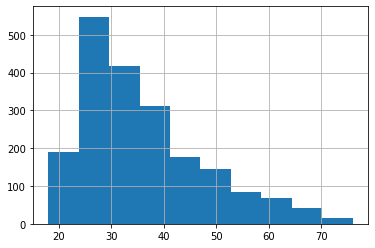

In [20]:
#Observando a idade dos usuários das lojas
df['Age'].hist()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


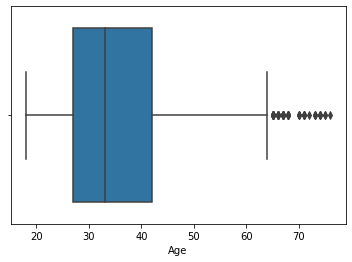

In [23]:
#Observando possíveis outliers
sns.boxplot(df['Age'])

Como os outliers são de idades acima de 60 anos, vamos mantê-los pois não aparenta ter erro nos dados e porque índices sociais indicam que na senioridade existe maior poderio financeiro, por isso serão importantes para nossas análises

In [25]:
#Observando agora a variável da escolaridade
df['Education'].value_counts()

1    1386
2     291
0     287
3      36
Name: Education, dtype: int64

O local é mais frequentado por pessoas com ensino médio completo, onde da graduação até outros postos acadêmicos mais avançados tem uma quantidade minoritária

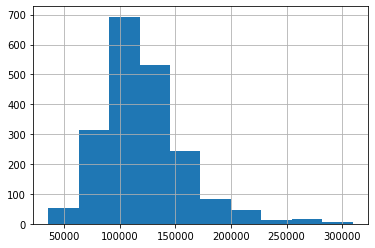

In [27]:
#Vamos observar os gastos no local
df['Income'].hist()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


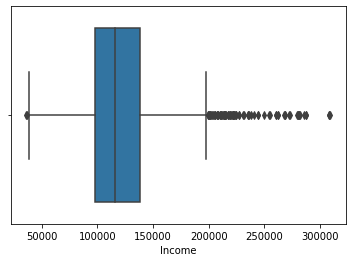

In [28]:
#Possíveis outliers
sns.boxplot(df['Income'])

Pela lógica apresentada na análise da idade prosseguirei aqui com os outliers, que podem ter correlação

In [29]:
#Análise bivariada da idade e dos gastos
fig  = px.scatter(df, x = 'Age', y = 'Income', log_x = True, width = 800)
fig.update_traces(marker = dict(size = 12, line=dict(width = 2)), selector = dict(mode = 'markers'))
fig.update_layout(title = 'Idade X Gastos')
fig.update_xaxes(title = 'Idade')
fig.update_yaxes(title = 'Gastos')
fig.show()

Apesar de haver uma média relativamente próxima aparentemente dos gastos, notamos que os valores mais altos de fato são compras feitas por pessoas acima de 40 anos, conforme desconfiavamos 

In [33]:
col_names_cleaned = []

for col_name in df.columns:
    col_names_cleaned.append(col_name.lower().replace(" ", "_"))
    
df.columns = col_names_cleaned

# sanity check
df.head()

,id,sex,marital_status,age,education,income,occupation,settlement_size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [30]:
#Separando as variáveis em numéricas e categóricas
num_cols = ["age", "income"]

In [31]:
cat_cols = ["sex", "marital_status", "education", "occupation", "settlement_size"]

In [34]:
#Fazendo a conversão
df[cat_cols] = df[cat_cols].astype(str)

In [35]:
#Vamos eliminar a coluna do ID, afinal ela é só um identificador
df.drop(columns=["id"], inplace=True)

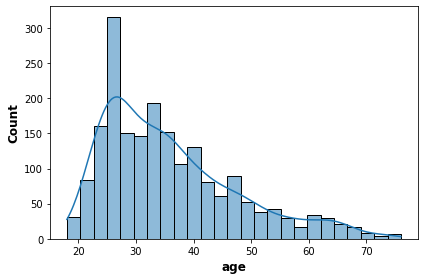

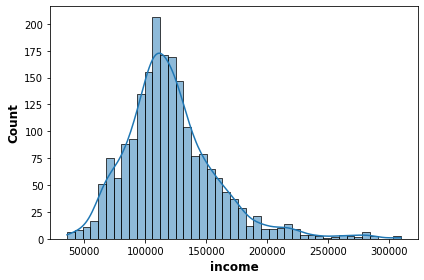

In [39]:
#Checando agora a distribuição das variáveis
for num_col in num_cols:
    fig, axs = plt.subplots()
    sns.histplot(df, x=num_col, kde=True)
    plt.show()

Os gastos possuem uma distribuição mais normal, enquanto a idade possui maiores discrepâncias na distribuição numérica sendo mais assimétrica

## 4- **Clustering**

In [40]:
# Convertendo novamente para inteiros
df[cat_cols] = df[cat_cols].astype(int)

In [42]:
# Fazendo a normalização dos dados
scaler = MinMaxScaler()
col_names = df.columns
X = scaler.fit_transform(df)
X = pd.DataFrame(data=X, columns=col_names)
# Checando
X.describe()

,sex,marital_status,age,education,income,occupation,settlement_size
count,2000.00000,2000.00000,2000.00000,2000.00000,2000.00000,2000.00000,2000.00000
mean,0.45700,0.49650,0.30878,0.34600,0.31120,0.40525,0.36950
std,0.49827,0.50011,0.20206,0.19993,0.13932,0.31929,0.40627
min,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,0.00000,0.00000,0.15517,0.33333,0.22605,0.00000,0.00000
50%,0.00000,0.00000,0.25862,0.33333,0.29143,0.50000,0.50000
75%,1.00000,1.00000,0.41379,0.33333,0.37378,0.50000,0.50000
max,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000


In [44]:
#Analisando se a técnica do mini Batch do KMeans nos traz mais velocidade no processamento dos dados
%%time
kmeans = MiniBatchKMeans(n_clusters=4)
_ = kmeans.fit_predict(X)

CPU times: user 191 ms, sys: 73.3 ms, total: 264 ms
Wall time: 427 ms


In [45]:
%%time
kmeans = KMeans(n_clusters=4)
_ = kmeans.fit_predict(X)

CPU times: user 223 ms, sys: 139 ms, total: 362 ms
Wall time: 193 ms


Diferença praticamente irrelevante, muito provavelmente por termos um dataset com poucas dimensões

In [46]:
#Fazendo um range para procurarmos nosso K ideal
n_clusters = range(1, 10)

inertia = []

for n in n_clusters:
    kmeans = KMeans(n_clusters=n)
    _ = kmeans.fit_predict(X)
    inertia.append(kmeans.inertia_)

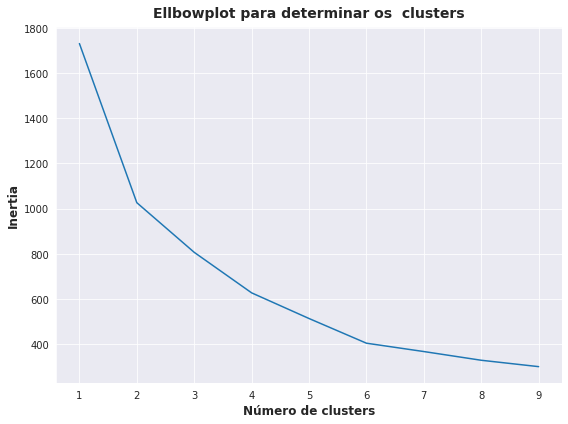

In [47]:
#Método do cotovelo
fig, axs = plt.subplots(figsize=figure_size)
sns.lineplot(x=n_clusters, y=inertia)
axs.set_xlabel("Número de clusters")
axs.set_ylabel("Inertia")
axs.set_title("Ellbowplot para determinar os  clusters")
plt.show()

In [88]:
#Reduzindo dataset
#principal=PCA(n_components=2)
#principal.fit(X)
#df_new=principal.transform(X)

In [94]:
#Treinando KMeans para K=6
%%time
kmeans = KMeans(n_clusters=6)
_ = kmeans.fit_predict(X)


CPU times: user 432 ms, sys: 148 ms, total: 581 ms
Wall time: 565 ms


In [95]:
%%time
reducer = umap.UMAP(n_components=2)
embedding = reducer.fit_transform(X)

CPU times: user 21.8 s, sys: 150 ms, total: 22 s
Wall time: 21.5 s


In [96]:
#Após reduzimos a dimensionalidade vamos definir os novos eixos
embedding = pd.DataFrame(embedding, columns=["comp_1", "comp_2"])


In [97]:
#Treinando KMeans novamente mas coma  redução da dimensionalidade
%%time
kmeans = KMeans(n_clusters=6)
_ = kmeans.fit_predict(embedding)

CPU times: user 126 ms, sys: 1.2 ms, total: 127 ms
Wall time: 73.7 ms


In [98]:
embedding["cluster"] = kmeans.labels_


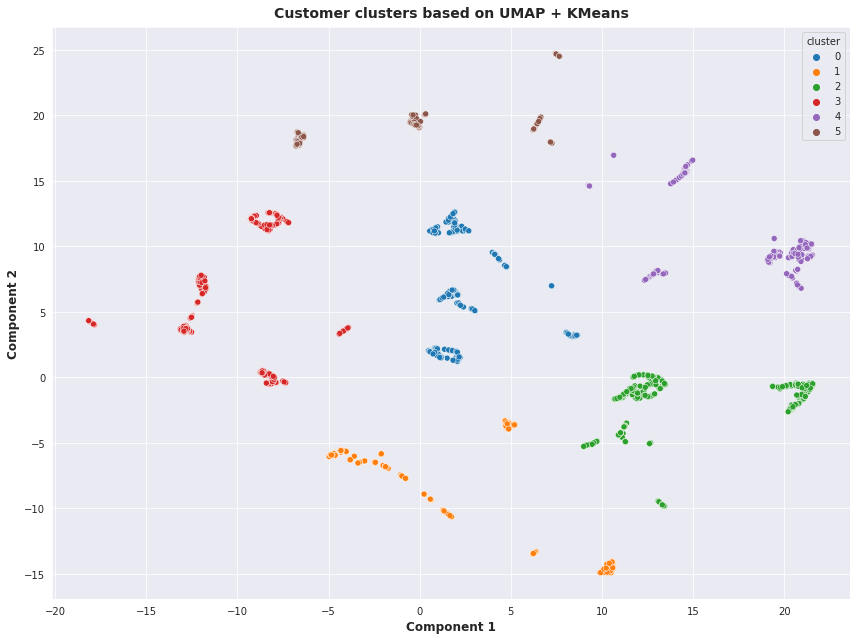

In [99]:
#Plotando os clusters
fig, axs = plt.subplots(figsize=(12,9))
sns.scatterplot(data=embedding, x="comp_1", y="comp_2", hue="cluster", palette="tab10")
axs.set_xlabel("Component 1")
axs.set_ylabel("Component 2")
axs.set_title("Customer clusters based on UMAP + KMeans")
plt.show()

## **5- Analisando os clusters e conclusões**

In [100]:
df["cluster"] = kmeans.labels_

In [101]:
#Observando
df.head()

,sex,marital_status,age,education,income,occupation,settlement_size,cluster
0,0,0,67,2,124670,1,2,0
1,1,1,22,1,150773,1,2,1
2,0,0,49,1,89210,0,0,3
3,0,0,45,1,171565,1,1,0
4,0,0,53,1,149031,1,1,0


In [102]:
#Convertendo categóricas para observarmos alguns comportamentos
cat_cols.append("cluster")
df[cat_cols] = df[cat_cols].astype(str)

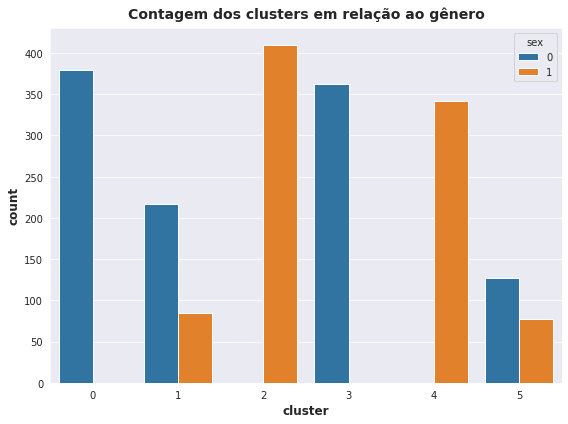

In [104]:
fig, axs = plt.subplots(figsize=figure_size)
sns.countplot(data=df, x="cluster", hue="sex", order=["0", "1", "2", "3", "4", "5"])
axs.set_title("Contagem dos clusters em relação ao gênero")
plt.show()

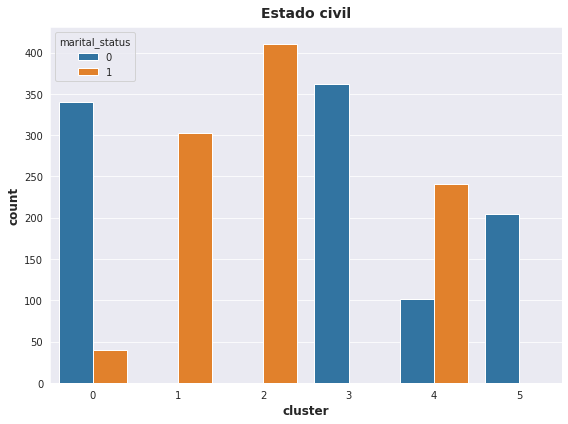

In [105]:
fig, axs = plt.subplots(figsize=figure_size)
sns.countplot(data=df, x="cluster", hue="marital_status", order=["0", "1", "2", "3", "4", "5"])
axs.set_title("Estado civil")
plt.show()

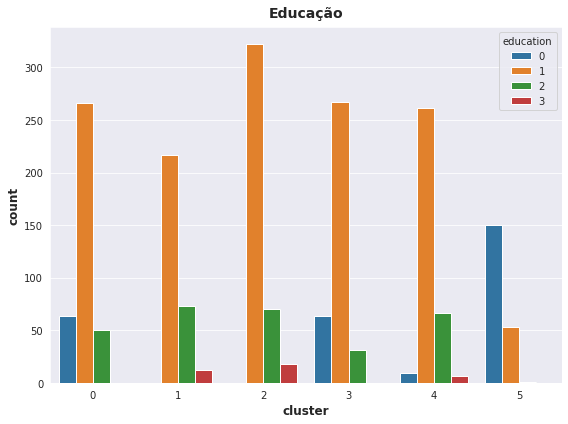

In [106]:
fig, axs = plt.subplots(figsize=figure_size)
sns.countplot(data=df, x="cluster", hue="education", order=["0", "1", "2", "3", "4", "5"], hue_order=["0", "1", "2", "3"])
axs.set_title("Educação")
plt.show()

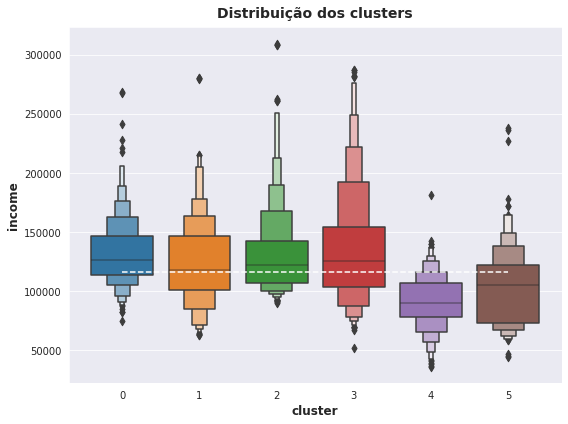

In [108]:
#Distribuição final dos clusters
fig, axs = plt.subplots(figsize=figure_size)
sns.boxenplot(data=df, x="cluster", y="income", order=["0", "1", "2", "3", "4", "5"])
plt.hlines(y=df.income.median(), xmin=0, xmax=5, colors="w", linestyles="dashed")
axs.set_title("Distribuição dos clusters")
plt.show()

**CONCLUSÕES**

No cluster 0 há uma exclusividade masculina, de pessoas solteiras e uma tendência a uma escolaridade mais baixa

No cluster 1 há uma exclusividade feminina, variação entre estado civil e exclusividade de escolaridade para high school, além de serem de cidades pequenas

No cluster 2 também há exclusividade feminina, de pessoas em relacionamentos e uma escolaridade mais elevada em comparação a outros clusters, além de pertencerem a cidades médias e grandes

no cluster 3 há uma variação entre os sexos, mas uma exclusividade de solteiros e tendência a educação menos elevada e novamente de cidades pequenas

No cluster 4 há uma exclusividade masculina e de solteiros, com educação baixa e de pequenas ou grandes cidades, ou seja, dos extremos populacionais

No cluster 5 temos um misto de sexos, exclusividade de pessoas em relacionamentos e tendência de educação baixa

Aqui notamos que temos clusters/grupos bem definidos, o que gera muotos insights para nossas lojas. Por exemplo: Em uma data comemorativa como dia dos namorados faz mais sentido priorizar produtos mais caros para o cluster 2, que possui pessoas em relacionamento e de condições financeiras mais elevadas tendo-se a correlação social com a escolaridade


